In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [4]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           class_sep=1.5, random_state=42)

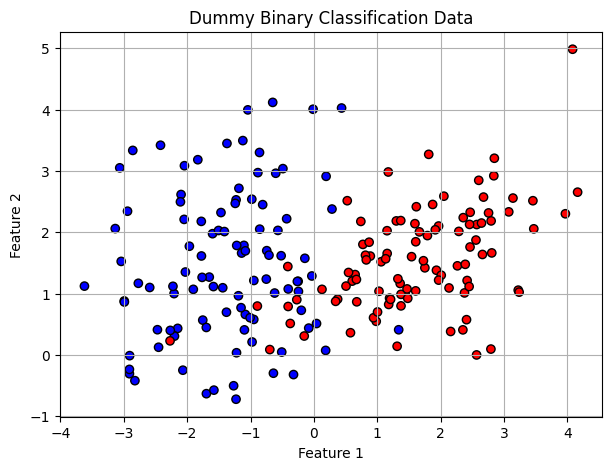

In [5]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Dummy Binary Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [6]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [7]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add bias term

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    return -(1/m) * (y @ np.log(h + 1e-5) + (1 - y) @ np.log(1 - h + 1e-5))

In [8]:
def gradient_descent(X, y, alpha=0.1, epochs=1000):
    theta = np.zeros(X.shape[1])
    cost_history = []
    for _ in range(epochs):
        h = sigmoid(X @ theta)
        gradient = X.T @ (h - y) / y.size
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

theta_gd, cost_history = gradient_descent(X_b, y)

In [9]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200))

In [10]:
Z_sklearn = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sklearn = Z_sklearn.reshape(xx.shape)

In [11]:
# manual
grid = np.c_[np.ones((xx.size, 1)), xx.ravel(), yy.ravel()]
Z_manual = sigmoid(grid @ theta_gd) >= 0.5
Z_manual = Z_manual.reshape(xx.shape)

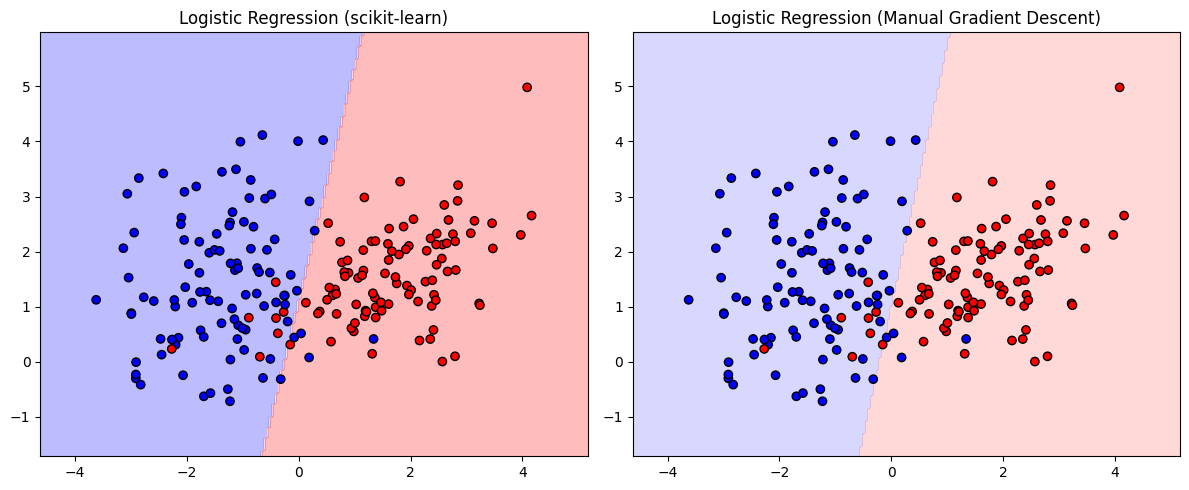

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_sklearn, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Logistic Regression (scikit-learn)")

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_manual, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Logistic Regression (Manual Gradient Descent)")

plt.tight_layout()
plt.show()